In [1]:
# 机器学习速成课程
# 前提条件和准备工作
# 机器学习速成课程中的Tensorflow高阶tf.estimator API, 学习低级TensorFlow


In [3]:
## TensorFlow Hello World 
# HelloWorld.py 
import tensorflow as tf 

c = tf.constant('Hello, world!')
with tf.Session() as sess:
    print(sess.run(c))

b'Hello, world!'


In [5]:
# TensorFlow 编程概念
# 张量 -- 任意维度的数组
# 标量 -- 零纬数组（零阶张量） 例如：‘Howday’
# 矢量 -- 一维数组 (一阶张量) 例如： [2,3,4,5]
# 矩阵 -- 二维数组 （二阶张量）例如：[[3., 8.2, 5.9][4.3,-2.7,6.5]]
# 指令 -- 图的节点是指令
# 图   -- 计算图或数据流图 是一种图数据结构，
# 会话
# 常量和变量都只是图中的一种指令，常量是始终返回同一张量值的指令，变量是会返回分配给它的任何张量的指令

import tensorflow as tf 

x = tf.constant([5.2]) # 定义常量
y = tf.Variable([5])   # 创建变量-需要指定默认值
y = y.assign([5])      # 分配值

# TensorFlow 编程本质是两步流程
# 1.将常量、变量和指令整合到一个图中
# 2.在一个回话中评估这些变量，常量和指令

In [10]:
# 创建 两个常量相加的简单TensorFlow程序
import tensorflow as tf 
import matplotlib.pyplot as plt # 数据集可视化
import numpy as np # 低级数字Python库
import pandas as pd # 较高级别的数字Python库

# Tensorflow 提供一个默认图，建议明确创建自己的Graph,以便追踪状态
g = tf.Graph() # Create a graph 

# Establish the graph as the default graph 
with g.as_default():
    # Assemble a graph consisting of the following three operations:
    #  * Two tf.constant operations to create the operands 
    #  * One tf.add operation to add the two operands 
    x = tf.constant(8, name="x_const")
    y = tf.constant(5, name="y_const")
    z = tf.constant(13, name="z_const")
    sum = tf.add(x,y, name="x_y_sum")
    new_sum = tf.add(sum,z, name="x_y_z_sum")
    
    # Now create a session
    # The session will run the default graph 
    with tf.Session() as sess:
        print(new_sum.eval())

26


In [11]:
# 创建和操作张量
import tensorflow as tf 

with tf.Graph().as_default():
    # Create a six-element vector (1-D tensor).
    primes = tf.constant([2,3,5,7,11,13], dtype=tf.int32)
    
    # Create another six-element vector. Each element in the vector will be 
    # initialized to 1。 The first argument is the shape of the tensor (more
    # one shapes below).
    ones = tf.ones([6], dtype=tf.int32)
    
    # Add the two vectors. The resulting tensor is a six-element vector.
    just_beyond_primes = tf.add(primes, ones)
    
    # Create a session to run the default graph.
    with tf.Session() as sess:
        print(just_beyond_primes.eval())

[ 3  4  6  8 12 14]


In [16]:
# 张量 sensor shape 用于描述张量维度的大小和数量，张量的形状表示为列表，其中第i个元素表示维度i的大小，列表的长度表示张量的阶（维数）
import tensorflow as tf 

with tf.Graph().as_default():
    # A scalar (0-D tensor)
    scalar = tf.zeros([])
    
    # A vector with 3 elements
    vector = tf.zeros([3])
    
    # A matrix with a 2 rows and 3 columns.
    matrix = tf.zeros([2,3])
    
    with tf.Session() as sess:
        print('scalar has shape', scalar.get_shape(), 'and value:\n', scalar.eval())
        print('vector has shape', vector.get_shape(), 'and value:\n', vector.eval())
        print('matrix has shape', matrix.get_shape(), 'and value:\n', matrix.eval())

scalar has shape () and value:
 0.0
vector has shape (3,) and value:
 [0. 0. 0.]
matrix has shape (2, 3) and value:
 [[0. 0. 0.]
 [0. 0. 0.]]


In [17]:
# 利用广播，元素级运算中的较小数组会增大到与较大数组具有相同的形状
# 当张量被广播时， 从概念上说，系统会复制其条目，出于性能考虑，实际上不复制，广播转为实现性能优化设计
import tensorflow as tf 

with tf.Graph().as_default():
    # Create a six-element vector (1-D tensor)
    primes = tf.constant([2,3,5,7,11,13], dtype=tf.int32)
    
    # Create a constant scalar with value 1.
    ones = tf.constant(1, dtype=tf.int32)
    
    # Add the two tensors. The resultion tensor is a six-element vector.
    just_beyond_primes = tf.add(primes, ones)
    
    with tf.Session() as sess:
        print(just_beyond_primes.eval())

[ 3  4  6  8 12 14]


In [18]:
# 矩阵乘法
# 线性代数中，连个矩阵相乘， 第一个矩阵的列数必须等于第二个矩阵的行数
import tensorflow as tf 

with tf.Graph().as_default():
    # Create a matrix (2-d tensor) with 3 rows and 4 columns 
    x = tf.constant([[5,2,4,3],[5,1,6,-2],[-1,3,-1,-2]], dtype=tf.int32)
    
    # Create a matrix with 4 rows and 2 columns 
    y = tf.constant([[2,2],[3,5],[4,5],[1,6]], dtype=tf.int32)
    
    # Multiply `x` by `y`
    # The resulting matrix will have 3 rows and 2 columns 
    matrix_multiply_result = tf.matmul(x, y)
    
    with tf.Session() as sess:
        print(matrix_multiply_result.eval())

[[35 58]
 [35 33]
 [ 1 -4]]


In [21]:
# 张量变形
import tensorflow as tf 

with tf.Graph().as_default():
    # Create an 8x2 matrix (2-D tensor).
    matrix = tf.constant([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16]], dtype=tf.int32)
    
    # Reshape the 8x2 matrix into a 2x8 matrix 
    reshaped_2x8_matrix = tf.reshape(matrix, [2,8])
    
    # Reshape the 8x2 matrix into a 4x4 matrix 
    reshaped_4x4_matrix = tf.reshape(matrix, [4,4])
    
    with tf.Session() as sess:
        print("Original matrix (8x2):\n", matrix.eval(),"\n")
        print("Reshaped matrix (2x8):\n", reshaped_2x8_matrix.eval(),"\n")
        print("Reshaped matrix (4x4):\n", reshaped_4x4_matrix.eval(),"\n")
    
# tf.reshape() 更改张量的维数‘阶’
with tf.Graph().as_default():
    # Create an 8x2 matrix (2-D tensor).
    matrix = tf.constant([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16]], dtype=tf.int32)
    
    # Reshape the 8x2 matrix into a 3-D 2x2x4 tensor 
    reshape_2x2x4_tensor = tf.reshape(matrix, [2,2,4])
    
    # Reshape the 8x2 matrix into a 1-D 16-element tensor
    one_dimensional_vector = tf.reshape(matrix, [16])
    
    with tf.Session() as sess:
        print("Original matrix (8x2):\n", matrix.eval(),"\n")
        print("Reshaped matrix 3-D tensor (2x2x4):\n", reshape_2x2x4_tensor.eval(),"\n")
        print("Reshaped matrix 1-D vector:\n", one_dimensional_vector.eval(),"\n")


Original matrix (8x2):
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]] 

Reshaped matrix (2x8):
 [[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]] 

Reshaped matrix (4x4):
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]] 

Original matrix (8x2):
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]] 

Reshaped matrix 3-D tensor (2x2x4):
 [[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9 10 11 12]
  [13 14 15 16]]] 

Reshaped matrix 1-D vector:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 



In [25]:
# 练习1: 改变两个张量的形状，使其能够相乘

import tensorflow as tf 

with tf.Graph().as_default(), tf.Session() as sess:
    a = tf.constant([5,3,2,7,1,4])
    b = tf.constant([4,6,3])
    
    reshaped_a = tf.reshape(a, [2,3])
    reshaped_b = tf.reshape(b, [3,1])
    
    matrix_multiply_result = tf.matmul(reshaped_a, reshaped_b)
    
    print(matrix_multiply_result.eval())
    # An alternate approach: [6,1] x [1,3] -> [6,3]

[[44]
 [46]]


In [29]:
# 变量，初始化和赋值
import tensorflow as tf 

g = tf.Graph()
with g.as_default(), tf.Session() as sess:
    # Create a variable with the initial value 3
    v = tf.Variable([3])
    
    # Create a variable of shape [1], with a random initial value 
    # sampled from a normal distribution with mean 1 and standard deviation 0.35 
    w = tf.Variable(tf.random_normal([1], mean=1.0, stddev=0.35))
    # Tensorflow 的一个特性是变量的初始化不是自动进行的，  
    sess.run(tf.global_variables_initializer()) # 初始化变量
    try:
        # Now, variables can be accessed normally, and have values assigned to them 
        print(v.eval()) # This should print the variable's initial value 
        
        assignment = tf.assign(v, [7])
        print(v.eval()) # The variable has not been changed yet!
        
        # Execute the assignment op.
        sess.run(assignment)
        print(v.eval()) # Now the variable is updated
        
    except tf.errors.FailedPreconditionError as e:
        print("Caught expected error: ", e)

[3]
[3]
[7]


In [30]:
# 模拟投掷两个骰子10次
# 创建一个骰子模型，在模拟中生成一个10x3二维张量
#    列1 和 2均存储一个骰子的一次投掷值
#    列3 存储同一行中列1 和 2 的值得总和 
import tensorflow as tf 

with tf.Graph().as_default(), tf.Session() as sess:
    # We're going to place dice throws inside two separate 
    dice1 = tf.Variable(tf.random_uniform([10,1], minval=1, maxval=7, dtype=tf.int32))
    dice2 = tf.Variable(tf.random_uniform([10,1], minval=1, maxval=7, dtype=tf.int32))
    
    # We may add dice1 and dice2 since they share the same shape and size 
    dice_sum = tf.add(dice1, dice2)
    
    # We've got three separate 10x1 matrices. To produce a single 10x3 matrix we'll concatenate them along dimension 1
    resulting_matrix = tf.concat(values=[dice1, dice2, dice_sum], axis=1)
    
    # The variables haven't been initialized within the graph yet
    # so let's remedy that.
    sess.run(tf.global_variables_initializer())
    
    print(resulting_matrix.eval())

[[ 3  6  9]
 [ 6  6 12]
 [ 3  5  8]
 [ 5  2  7]
 [ 6  3  9]
 [ 2  3  5]
 [ 6  2  8]
 [ 6  6 12]
 [ 3  2  5]
 [ 4  2  6]]


In [ ]:
# 基本数据概念

# 变量，系数和函数 
# 线性方程 y= b + wx 
# 对数和对数方程 y = ln(1+e^2)
# S型函数 （Sigmoid function）

# 线性代数
# 张量和张量的等级
# 矩阵乘法

# 三角学
# Tanh (作为激活函数进行讲解)

# 统计信息
# 平均数，中间值，离群值和标准偏差
# 直方图

# 微积分
# 导数
# 梯度
# 偏导数
# 链式法则

# Python编程
# 中级Python 

# 第三方Python库
# Matplotlib (适合数据可视化) {pyplot, cm, gridspec}
# Seaborn  (适合热图) [heatmap]
# pandas (适合数据处理) [DataFrame]
# Numpy (适合低阶数据运算) [linspace, random, array, arange]
# scikit-learn (适合评估指标) [metrics] 

# Bash 终端
# Bash 参考手册

In [ ]:
# 机器学习简介
# There's a philosophical reason:
#   Machine Learning changes the way you think about a problem.
#   Software engineers are trained to think logically and mathematically
#   we use assertions to prove properties of our program are correct
# With Machine Learning, the focus shifts from mathematical science to a natural science
# we're making observations about an uncertain world
# running experments, and using statistics, not logic, to analyze the result of the experiment

In [ ]:
# Framing: Key ML Terminology
# supervised machine learning 
# In supervised machine learning, we are learning to create models that combine inputs, to produce useful predictions even on previously unseen data.
# What is (supervised) machine learning?
# - ML Systems learning how to combine input to produce useful predictions on never before seen data.


# Labels   -- output  data y (true things we're predicting)
# features -- input variable x (describing our data)
# Example  -- is a particular instance of data x 
#    Labeled example {features, labels}(x,y)
#    Unabled example {features, ?} (x,?)
# Models   -- defines the relationship between features and label.
#   Training --->   Inference 

# Regression vs. classification 
# regression model -- predicts continuous values    回归问题
# classification model -- predicts discrete values  分类问题

In [ ]:
# Descending into ML 
# Linear regression is a method for finding the straight line or hyperplane that best fits a set pf points.
# W: slope
# B: bias 
# Loss Function: Loss = ∑(y - prediction(x))^2 
#   ∑: we're summing over all examples in the training set 
#   D: 
# squared error: (observation - prediction)^2 
# y = mx + b 
#   y is the termperature in Celsius - the value we're trying to predict 
#   m is the slope of the line 
#   x is the number of chirps per minute-the value of our input feature 
#   b(bias) is the y-intercept 

# For example, a model that relies on three features would use the following equation
# y' = w₀ + w₁x₁ + w₂x₂ + w₃x₃

# Training and Loss
# The goal of training a model is to find a set of weights and biases that have low loss.

# Squared loss: a popular loss function 
# squared loss also known as L₂ loss.

# MSE(Mean square error) MSE = 1/N ∑(y - prediction(x))２ 

In [ ]:
# Reducing Loss 
# Gradient Descent, 
# Could compute gradient over entire data set on each step, but this turns out to be unnecessary
# Computing gradient on small data samples works well 
# Stochastic Gradient Descent: One example at a time 
# Mini-Batch Gradient Descent: batches of 10-1000 
# Trial-and-error process 试错的过程 
# gradient is a vector: [a direction, a magnitude]
# The gradient always points in the direction of steepest increase in the loss function. The gradient descent algorithm takes a step in the direction of the negative gradient in order to reduce loss as quickly as possible.

# Learning Rate: also sometimes called step size.
# Goldilocks : learning rate for every regression problem.

# Stochastic Gradient Descent 随机梯度下降 it uses only a single example (a batch size of 1) per iteration.
# Mini-batch stochastic gradient descent (mini-batch SGD) is typically between 10 and 1000 examples

# Playground Exercise:

In [31]:
# First Steps with TensorFlow 
# TensorFlow API Hierarchy
#    TensorFlow Estinators -- High-level, object-oriented API 
#    tf.layers, tf.losses, tf.metrics -- Reusable libraries for common model components 
#    Python TensorFlow 
#    C++ TensorFlow 
#    CPU + GPU TPU 

# TensorFlow consists of the following two components 
#    a graph protocol buffer 
#    a runtime that executes the (distributed) graph 

# tf.estimator API 
# tf.estimator is compatible with the scikit-learn API.
# Scikit-learn is an extrmely popular open-source ML library in Python, with over 100K users, including many at Google

# linear regression program implemented in tf.estimator 
import tensorflow as tf 

# Set up a linear classifier 
classifier = tf.estimator.LinearClassifier()

# Train the model on some example data
classifier.train(input_fn=train_input_fn, steps=2000)

# Use it predict 
predictions = classifier.predict(input_fn=predict_input_fn)

TypeError: __init__() missing 1 required positional argument: 'feature_columns'

pandas API version:  0.22.0
Series:
 0    San Francisco
1         San Jose
2       Sacramento
dtype: object
DataFrame:
        City name  Population
0  San Francisco      852469
1       San Jose     1015785
2     Sacramento      485199
<class 'pandas.core.series.Series'>
<class 'str'>
San Jose
<class 'pandas.core.frame.DataFrame'>
       City name  Population
0  San Francisco      852469
1       San Jose     1015785
0    False
1     True
2    False
dtype: bool
       City name  Population  Area square miles  Population density   Bool
0  San Francisco      852469              46.87        18187.945381  False
1       San Jose     1015785             176.53         5754.177760   True
2     Sacramento      485199              97.92         4955.055147  False
RangeIndex(start=0, stop=3, step=1)


,City name,Population,Area square miles,Population density,Bool
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


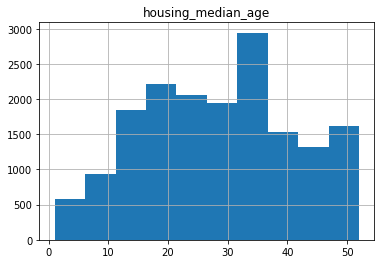

In [63]:
# Quick Introduction to pandas 
# pandas is a column-oriented data analysis API.

# imports the pandas API and prints the API version
import pandas as pd 
print("pandas API version: ",pd.__version__)

# The primary data structures in pandas are implemented as two classes:
#    DataFrame, which you can imagine as a relational data table, with rows and named columns
#    Series, which is a single colomn. A DataFrame contains one or more Series and a name for each Series 

# Create a Series 
print("Series:\n", pd.Series(['San Francisco', 'San Jose', 'Sacramento']))

city_name = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

print("DataFrame:\n", pd.DataFrame({'City name': city_name, 'Population':population}))

# load a file 
california_housing_dataframe = pd.read_csv("./data-set/mlcc/california_housing_train.csv",sep=",")
california_housing_dataframe.describe() # show interesting statistics about a DataFrame
california_housing_dataframe.head()
california_housing_dataframe.hist('housing_median_age') # quickly study the distribution of values in a column

# Accessing Data
cities = pd.DataFrame({'City name': city_name, 'Population': population })
print(type(cities['City name']))
print(type(cities['City name'][1]))
print(cities['City name'][1])
print(type(cities[0:2]))
print(cities[0:2])

# Manipulating Data
population / 1000

# Numpy is popular toolkit for scientific computing
import numpy as np

np.log(population)
# below creates a new Series that indicates whether population if over one million.
print(population.apply(lambda val: val > 1000000))

# Modifying DataFrame is also straightforward. 
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities['Bool'] = (cities['Area square miles'] > 50) & (cities['City name'].apply(lambda name: name.startswith('San')))
print(cities)

# Index Once created, index values are stable; that is, they do not change when data is reorded 
print(city_name.index)
cities.reindex([2,0,1]) # same effects as sorting by city name
cities.reindex([0,4,5,2]) # missing indices and populate all corresponding columns with NaN values

Mean Squared Error (on training data): 56367.025
Root Mean Squared Error (on training data): 237.417
Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 237.417


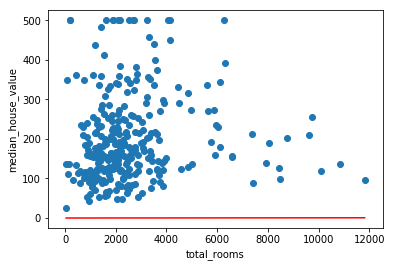

Training model...
RMSE (on training data):
  period 00 : 186.29
  period 01 : 166.92
  period 02 : 166.83
  period 03 : 166.78
  period 04 : 166.71
  period 05 : 166.84
  period 06 : 166.84
  period 07 : 166.96
  period 08 : 166.74
  period 09 : 166.67
Model training finished


,predictions,targets
count,17000.0,17000.0
mean,139.3,207.3
std,114.9,116.0
min,0.1,15.0
25%,77.0,119.4
50%,112.1,180.4
75%,166.0,265.0
max,1999.0,500.0


Final RMSE (on training data): 166.67


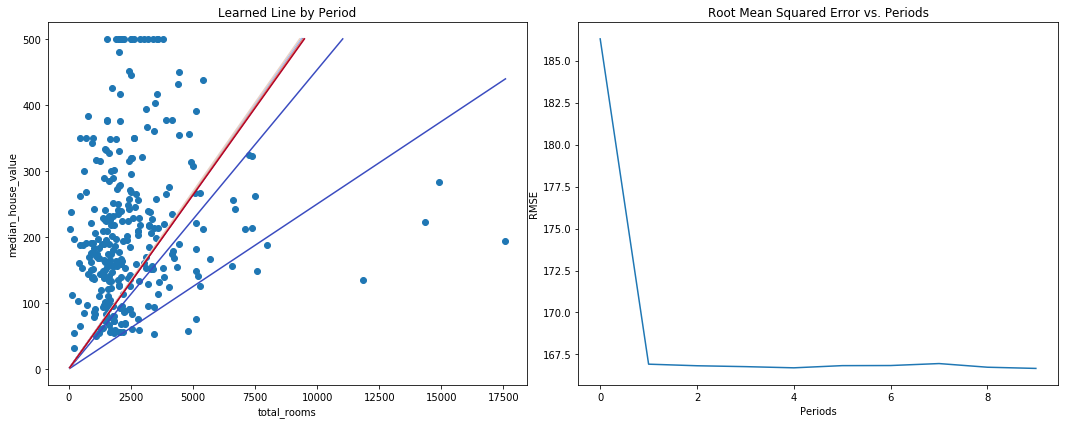

In [88]:
# First Steps with TensorFlow
# 学习目标：
#    学习基本的TensorFlow概念
#    在TensorFlow中使用LieanrRegressor类并基于输入特征预测各城市街区的房屋价值的中位数
#    使用均方根误差(RMSE)评价模型预测的准确率
#    通过调整模型的超参数提高模型的准确率

# load the necessary libraries 
import math 
from IPython import display 
from matplotlib import cm 
from matplotlib import gridspec 
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn import metrics
import tensorflow as tf 
from tensorflow.python.data import Dataset 

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10 
pd.options.display.float_format = '{:.1f}'.format 

# Load our data set 
california_housing_dataframe = pd.read_csv("./data-set/mlcc/california_housing_train.csv", sep=",")

# 随机化处理数据 randomize the data, just to be sure not to get any pathlogical ordering effects that might harm the performance of Stochastic Gradient Descent.
california_housing_dataframe = california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))
# 调整单位 scale median_house_value to be in units of thousands, so it can be learned a little more easily with learning rates in a range that we usually use.
california_housing_dataframe["median_house_value"] /= 1000.0 

# 检查数据 查看统计信息快速摘要
# summary useful statistics on each column: count of examples, mean, standard deviation, max, min, and various quantiles
california_housing_dataframe.describe()

# Build the First Model
# predict median_house_value, which will be our label, use total_rooms as our input feature.

# Step 1: Define Features and Configure Feature Columns 
# Categorical(分类) Data : Data that is textual(文本)
# Numerical (数值)Data   : Data that is a number (integer or float)

# Define the input feature: total_room 
# 特征列仅存储对特征数据的描述，不包含特征数据本身
my_feature = california_housing_dataframe[["total_rooms"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

# Step 2: Define the Target 
# Define the label.
targets = california_housing_dataframe["median_house_value"]

# Step 3: Configure the LinearRegressor 
# configure a linear regression model using LinearRegressor 
# train this model using the GradientDescentOptimizer,which implements Mini-Batch Stochastic Gradient Descent(SGD)

# Use gradient descent as the optimizer for training the model 
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.000001 for Gradient Descent. 
linear_regressor = tf.estimator.LinearRegressor(feature_columns = feature_columns,
                                               optimizer = my_optimizer
                                               )

# Step 4: Define the Input Function 
# Define an input function, which instructs TensorFlow how to preprocess the data, as well as how to batch, shuffle, and repeat it during model training.
# First, convert our pandas feature data into a dict of Numpy arrays.
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
    
    Args:
        features   : pandas DataFrame of features
        targets    : pandas DataFrame of targets 
        batch_size : Size of batches to be passed to the model 
        shuffle    : True or False. Whether to shuffle the data.
        num_epochs : Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
        Tuple of (features, labels) for next data batch 
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    # Construct a dataset data into a dict of np arrays.
    ds = Dataset.from_tensor_slices((features, targets)) # warning: warning: 2GB limit 
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified 
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data 
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

# Step 5: Train the Model 
_ = linear_regressor.train(
    input_fn = lambda: my_input_fn(my_feature, targets),
    steps=100
)

# Step 6: Evaluate the Model 

# Create an input function for predictions.
# Note: Since we're making just one prediction for each example,we don't
# need to repeat or shuffle the data here.
prediction_input_fn = lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as Numpy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)

# MSE = 1/n∑(y-y')²
# Mean Squared Error(MSE) can be hard to interpret, so we often look at Root Mean Squared Error(RMES) instead.
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" %root_mean_squared_error)

min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value 

print("Min. Median House Value: %0.3f" %min_house_value)
print("Max. Median House Value: %0.3f" %max_house_value)
print("Difference between Min. and Max.: %0.3f" %min_max_difference)
print("Root Mean Squared Error: %0.3f" %root_mean_squared_error)

# take a look at how well our predictions match our targets 
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["target"] = pd.Series(targets)
calibration_data.describe()

# drawing from the model's bias term and feature weight wogether with the scatter plot
sample = california_housing_dataframe.sample(n=300)

# Get the min and max total_rooms values.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0] # 特征权重
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights') # 模型的偏差项

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter 散点图 plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()

# 调整模型超参数
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
    """Trains a linear regression model of one feature.
    Args:
        learning_rate: A `float`, the learning rate.
        steps: A non-zero `int`, the total number of training steps. A training step
            consists of a forward and backward pass using a single batch.
        batch_size: A non-zero `int`, the batch size.
        input_feature: A `string` specifying a column from `calfornia_housing_dataframe`
            to use as input feature.
    """
    periods = 10 
    steps_per_period = steps / periods 
    
    my_feature = input_feature 
    my_feature_data = california_housing_dataframe[[my_feature]]
    my_label = "median_house_value"
    targets = california_housing_dataframe[my_label]
    
    # Create feature columns
    feature_columns = [tf.feature_column.numeric_column(my_feature)]
    
    # Create input functions
    training_input_fn = lambda: my_input_fn(my_feature_data, targets, batch_size=batch_size)
    prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
    
    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
        feature_columns=feature_columns,
        optimizer=my_optimizer
    )
    
    # Set up to plot the state of our model's line each period.
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.title("Learned Line by Period")
    plt.ylabel(my_label)
    plt.xlabel(my_feature)
    sample = california_housing_dataframe.sample(n=300)
    plt.scatter(sample[my_feature], sample[my_label])
    colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]
    
    # Train the model, but do so inside a loop so that we can periodically assess 
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    root_mean_squared_errors = []
    for period in range(0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # Take a break and compute predictions.
        predictions = linear_regressor.predict(input_fn=prediction_input_fn)
        predictions = np.array([item['predictions'][0] for item in predictions])
        
        # Compute loss.
        root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(predictions, targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        root_mean_squared_errors.append(root_mean_squared_error)
        # Finally, track the weights and biases over time.
        # Apply some math to ensure that the data and line are plotted neatly.
        y_extents = np.array([0, sample[my_label].max()])
        
        weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' %input_feature)[0]
        bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
        
        x_extents = (y_extents - bias) / weight
        x_extents = np.maximum(np.minimum(x_extents,
                                         sample[my_feature].max()),
                              sample[my_feature].min())

        y_extents = weight * x_extents + bias 
        plt.plot(x_extents, y_extents, color=colors[period])
    print("Model training finished")
    
    # Out a graph of loss metrics over periods.
    plt.subplot(1, 2, 2)
    plt.ylabel('RMSE')
    plt.xlabel('Periods')
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(root_mean_squared_errors)
    
    # Output a table with calibration data.
    calibration_data = pd.DataFrame()
    calibration_data["predictions"] = pd.Series(predictions)
    calibration_data["targets"] = pd.Series(targets)
    display.display(calibration_data.describe())
    
    print("Final RMSE (on training data): %0.2f" %root_mean_squared_error)

train_model(learning_rate=0.00001,
           steps=5000,
           batch_size=100 
)

train_model(learning_rate=0.00002,
           steps=1000,
           batch_size=5,
           input_feature="population"
)

# # 模型调整的标准
# # 经验法则
# # 训练误差应该稳步减小，刚开始是急剧减小，最终应随着训练收敛达到平稳状态
# # 如果训练尚未收敛，尝试运行更长时间
# # 如果训练误差减小速度过慢，则提高学习速率也许有助于加快其减小速度
# #    但是有时候学习速率过高，训练误差的减小速度反而会变慢
# # 如果训练误差变化很大，尝试降低学习速率
# #    较低的学习速率和较大的步数/较大的批量大小通常是不错的组合
# # 批量大小过小也会导致不稳定情况，不妨先尝试100 或 1000 等较大的值，然后逐渐减小的值的大小，知道出现性能降低的情况


Training model...
RMSE (on training data):
  period 00 : 212.77
  period 01 : 189.69
  period 02 : 169.71
  period 03 : 152.80
  period 04 : 140.51
  period 05 : 133.46
  period 06 : 131.20
  period 07 : 130.55
  period 08 : 130.72
  period 09 : 131.36
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,194.1,207.3
std,88.9,116.0
min,44.9,15.0
25%,159.3,119.4
50%,191.1,180.4
75%,218.2,265.0
max,4241.2,500.0


Final RMSE (on training data): 131.36
Training model...
RMSE (on training data):
  period 00 : 212.82
  period 01 : 189.06
  period 02 : 167.44
  period 03 : 147.10
  period 04 : 131.33
  period 05 : 120.95
  period 06 : 112.94
  period 07 : 110.67
  period 08 : 108.45
  period 09 : 107.84
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,201.9,207.3
std,52.8,116.0
min,47.1,15.0
25%,168.2,119.4
50%,201.9,180.4
75%,230.6,265.0
max,448.1,500.0


Final RMSE (on training data): 107.84


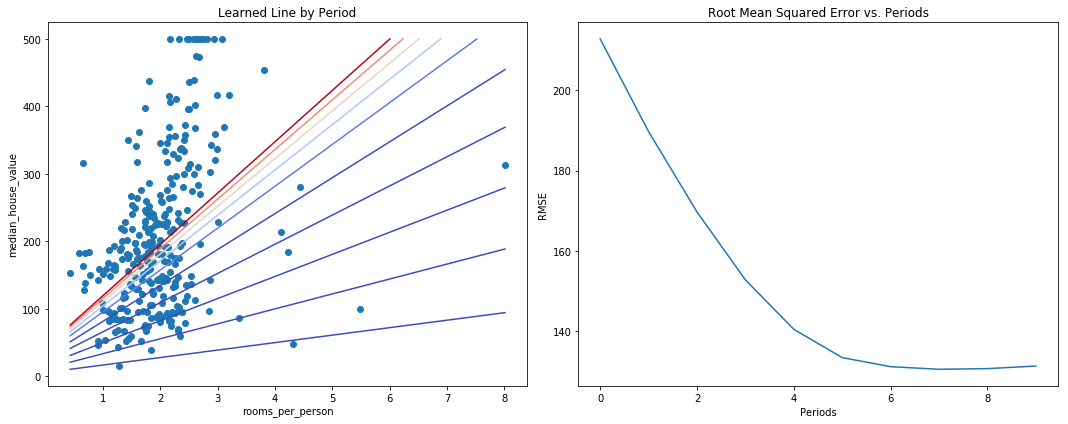

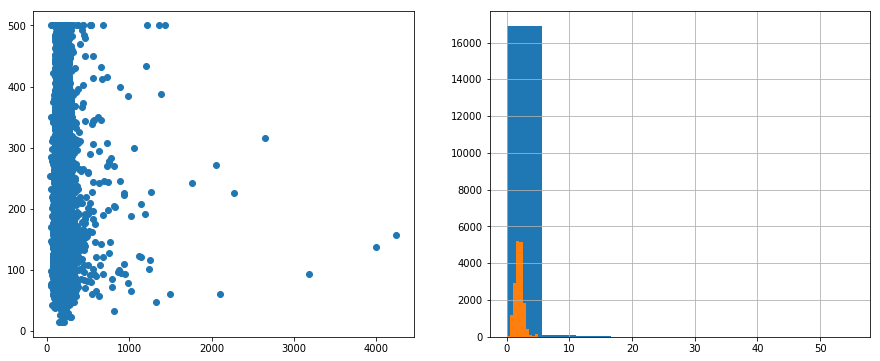

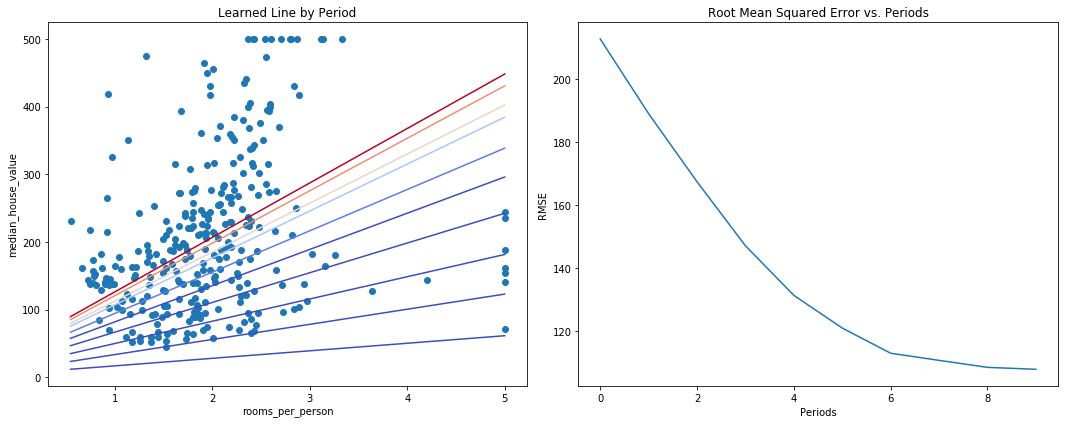

In [107]:
# Synthetic Features and Outliers 
# Learning Objectives:
#   Create a synthetic feature that is the ratio of two other features 
#   Use this new feature as an input to a linear regression model 
#   Improve the effectiveness of the model by identifying and clipping(removing) outliers out of the input data 

# steps: 训练迭代的总次数，一步计算一批样本产生的损失，然后使用该值修改模型的权重一次
# batch size: 是指单步的样本数量（）
# total number of trained examples = batch size * steps 
# periods : 控制报告的粒度， number of training examples in each period = (batch size * steps) / periods 

import math 

from IPython import display 
from matplotlib import cm 
from matplotlib import gridspec
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import sklearn.metrics as metrics 
import tensorflow as tf 
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10 
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("./data-set/mlcc/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
                                np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0

# set up input function 
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
    
    Args:
        features   : pandas DataFrame of features
        targets    : pandas DataFrame of targets 
        batch_size : Size of batches to be passed to the model 
        shuffle    : True or False. Whether to shuffle the data.
        num_epochs : Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
        Tuple of (features, labels) for next data batch 
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    # Construct a dataset data into a dict of np arrays.
    ds = Dataset.from_tensor_slices((features, targets)) # warning: warning: 2GB limit 
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified 
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data 
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

def train_model(learning_rate, steps, batch_size, input_feature):
  """Trains a linear regression model.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
      
  Returns:
    A Pandas `DataFrame` containing targets and the corresponding predictions done
    after training the model.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = california_housing_dataframe[[my_feature]].astype('float32')
  my_label = "median_house_value"
  targets = california_housing_dataframe[my_label].astype('float32')

  # Create input functions
  training_input_fn = lambda: my_input_fn(my_feature_data, targets, batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create feature columns
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
    
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
      metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
    
    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Create a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)
  
  return calibration_data

california_housing_dataframe["rooms_per_person"] = (
    california_housing_dataframe["total_rooms"] / california_housing_dataframe["population"])

calibration_data = train_model(
    learning_rate=0.05,
    steps=500,
    batch_size=5,
    input_feature="rooms_per_person")

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(calibration_data["predictions"], calibration_data["targets"])

plt.subplot(1, 2, 2)
_ = california_housing_dataframe["rooms_per_person"].hist()

# 截取离群值
california_housing_dataframe["rooms_per_person"] = (
    california_housing_dataframe["rooms_per_person"]).apply(lambda x: min(x, 5))
_ = california_housing_dataframe["rooms_per_person"].hist()

# 截取数据之后再次训练模型
calibration_data = train_model(
    learning_rate=0.05,
    steps=500,
    batch_size=5,
    input_feature="rooms_per_person"
)

In [ ]:
# Generalization 泛化
# 泛化是指模型很好拟合以前未见过的新数据
# 过拟合模型在训练过程中产生的损失很低，但是在预测新数据方面的表现比较差。
# 机器学习模型越简单，良好的实证结果就越有可能不仅仅基于样本的特性
# 将数据集分成两个子集
#    训练集 -- 用于训练模型的子集
#    测试集 -- 用于测试模型的子集
# 一般来说，在测试集上表现是否良好是衡量能否在新数据上表现良好的有用指标， 前提是：
#    测试集足够大
# 1. 从分布中随机抽取独立同分布(i.i.d)的样本，样本之间不会相互影响
# 2. 分布是稳定的，即分布在数据集内不会发生变化
# 3. 在同一分布的数据划分中抽取样本

In [ ]:
# 训练集和测试集（Training and TestSets）
# 确保您的测试集满足一下两个条件
#    规模足够大，可产生具有统计意义的结果
#    能代表整个数据集，挑选的测试集的特征应该与训练集的特征相同

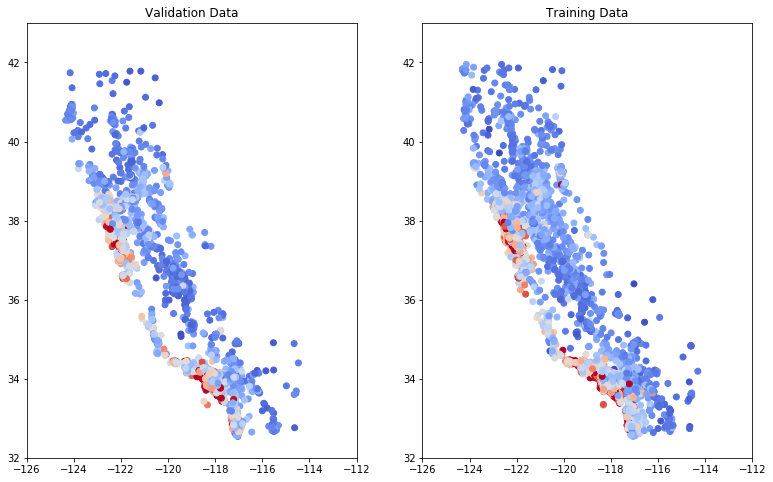

In [119]:
# Validation 
# 将数据集划分为三个子集： 训练集、验证集、 测试集
# 不断使用测试集和验证集会使其逐渐失去效果，您使用相同数据来决定超参数设置或其他模型改进的测数越多，您对于这些结果能够真正繁华到未见到的新数据的信心就越低，请注意，验证机的失效速度通常不测试集缓慢。
# 使用住房数据集，根据1990年的人口普查数据在城市街区级别预测median_house_value

import math

from IPython import display
from matplotlib import cm 
from matplotlib import gridspec 
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset 

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("./data-set/mlcc/california_housing_train.csv", sep=",")
california_housing_dataframe = california_housing_dataframe.reindex(
                                np.random.permutation(california_housing_dataframe.index))


def preprocess_features(california_housing_dataframe):
    """Prepares input features from California housing data set.
    
    Args:
        california_housing_dataframe: A Pandas DataFrame expected to contain data from the California housing data set.
    Returns:
        A DataFrame that contains the features to be used for the model, including synthetic features.
    """
    selected_features = california_housing_dataframe[
        ["latitude",
        "longitude",
        "housing_median_age",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_income"]]
    processed_features = selected_features.copy()
    # Create a synthetic feature.
    processed_features["rooms_per_person"] = (
        california_housing_dataframe["total_rooms"]/california_housing_dataframe["population"])
    return processed_features 

def preprocess_targets(california_housing_dataframe):
    """Prepares target features (i.e., labels) from California housing data set.
    Args:
        california_housing_dataframe: A Pandas DataFrame expected to contain data from the California housing data set.
    Returns:
        A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    # Scale the target to be in units of thousands of dollars.
    output_targets["median_house_value"] = (
        california_housing_dataframe["median_house_value"] / 1000.0)
    return output_targets 

# 训练集
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_examples.describe()
training_targets = preprocess_targets(california_housing_dataframe.head(12000))
training_targets.describe()

# 验证集
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_examples.describe()
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))
validation_targets.describe()

# 绘制纬度/经度与房屋价值中位数的曲线图
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(validation_examples["longitude"],
           validation_examples["latitude"],
           cmap="coolwarm",
           c = validation_targets["median_house_value"] / validation_targets["median_house_value"].max())

ax = plt.subplot(1, 2, 2)
ax.set_title("Training Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(training_examples["longitude"],
           training_examples["latitude"],
           cmap="coolwarm",
           c=training_targets["median_house_value"] / training_targets["median_house_value"].max())
_ = plt.plot()

# 机器学习中调试通常是数据调试而不是代码调试
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
    
    Args:
        features: pandas DataFrame of features
        targets: pandas DataFrame of targets 
        batch_size: Size of batches to be passed to the model
        shuffle: True or False. Whether to shuffle the data.
        num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    
    Returns:
        Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    # Construct a dataset, and configure batching/repeating
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified 
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data 
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels
    
def construct_feature_columns(input_features):
    """Construct the TensorFlow"""